# The Basics of NumPy Arrays

In [85]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

Each array has attributes `ndim`, `shape` and `size`

In [86]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [87]:
print("dtype:", x3.dtype)

dtype: int64


Other attributes: `itemsize` for size in bytes of each item, `nbytes` to get the size of the entire aray

In [88]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 8 bytes
nbytes: 480 bytes


## Slicing arrays
Basically the same as with python lists

## Subarrays as no-copy views

Slices return views and not copies, so updating a subarrays will update the entire array.

In [89]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [90]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[3 5]
 [7 6]]


In [91]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [92]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## Creating copies of arrays

Use `copy` method

In [93]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


## Reshaping of Arrays

To reshape the arrays, simply use `reshape` method

Example: turn a one dimension array to a 3x3 matrix

In [94]:
np.arange(1,10).reshape((3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Same, we can transform a one dimension array into a two-dimension array using `newaxis` keyword

In [95]:
x = np.array([1,2,3])
print(x.reshape((1,3)))
print(x[np.newaxis, :])

[[1 2 3]]
[[1 2 3]]


## Array Concatenation and Splitting

### Concatenation of arrays 

We mainly use `concatenate`, `vstack`, `hstack`

In [96]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [97]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [98]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [99]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of different dimensions, it can be clearer to use `vstack` and `hstack`

In [100]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [101]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Similary, `dstack` will stack arrays along the third axis

### Splitting of arrays

In opposition to concatenation, we may also want to split an array sometimes. To do so, as we do for concatenation, with use `split`, `hsplit` and `vsplit`. To these functions, we prodvide the indices of the split points

In [102]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [103]:
grid = np.arange(16).reshape((4, 4))
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [104]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Also, we can use `dsplit` to split along third axis

# Computation on NumPy Arrays: Universal Functions

Depending on implementation, computations of NumPy arrays can be really fast or really slow. The key to make it fast is to use _vectorized_ operations, generally implemented through NumPy's _universal functions (ufuncs)_.

## The Slowness of Loops

Python's loops are slow because of the way data are stored (with dynamic typing). It's really slow when small operations are being repeated.

Example to compute the reciprocal of each element of an array:

In [105]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

We can measure the performance with a big array

In [106]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1.79 s ± 3.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The reason of this slowness is not the operations in themself, but the type checking for each element. Using a ufunc solves this.

In [107]:
%timeit 1/big_array

1.55 ms ± 51.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Basically, vectorized operations in NumPy are implemented via _ufuncs_, 
whose main purpose is to quicklu execute repeated operations on values in NumPy arrays.


As ufuncs are extrimely flexible, we can also operate between two arrays:

In [108]:
np.arange(5)/np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

ufunc operations also work on multi-dimensional arrays

In [109]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

## Exploring NumPy's UFuncs

There are a lot of arithmetical operations, such as `+ - * /`...

### Absolute values

In [110]:
x = np.array([1,2,-3,4-5])
np.abs(x)

array([1, 2, 3, 1])

### Trigonometric functions
`np.sin`, `np.cos`, `np.tan`

### Exponents and logarithms
`np.exp`, `np.exp2`, `np.power` \
`np.log`, `np.log2`, `np.log10` \
To keep precision with very small inputs: `np.expm1`, `np.log1p`

### Specialized ufuncs

NumPy has many more ufuncs, especially in the `scipy` module 

In [111]:
from scipy import special

### Specifying output

Using the `out` arguments, we can specify an output for each ufunc.

In [112]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


This also works with array views

In [113]:
y = np.zeros(10)
np.power(2,x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


If we had instead written `y[::2] = 2 ** x`, a temporay array would have been created and then copied into `y`. With huge volume of data it could make a difference.

### Aggregates

Aggregates can sometimes be computed directly from the object, for example if `reduce` method.

In [114]:
x = np.arange(1,6)
print(np.add.reduce(x))
print(np.multiply.reduce(x))

15
120


To store intermediates results, use `accumulate`:

In [115]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

### Outer products

Any ufunc can compute the output of all pairs of two different inputs using the `outer` method.

In [116]:
x = np.arange(1,6)
np.multiply.outer(x,x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## More about UFuncs

Check NumPy and SciPy offcial sites

# Aggregations: Min, Max, and Everything In Between

Some of the following functions can also be called from the object directly (i.e.: `np.arange(5).sum()`)
- `np.sum`
- `np.min`
- `np.max`

### Multidimensional 

The axis (for a sum for example) can be specified.

In [117]:
M = np.random.random((3, 4))
print(M)
print(M.min(axis=0))

[[0.25241011 0.97572458 0.1197632  0.20856888]
 [0.23983126 0.39034023 0.61318864 0.8603706 ]
 [0.34645385 0.2939397  0.39274799 0.69444295]]
[0.23983126 0.2939397  0.1197632  0.20856888]


### Other aggregation functions

- `np.prod`
- `np.mean`
- `np.std`
- `np.var`
- `np.argmin`
- `np.argmax`
- `np.median`
- `np.percentile`
- `np.any`
- `np.all` \
For most of these functions, a NaN-safe version exists, prefixed by `nan` (i.e.: `np.nansum`)

# Computation on Arrays: Broadcasting

Broadcasting is simply a set of rules for applying binary ufuncs on arrays of different sizes

In [118]:
a = np.array([0,1,2])
a + 5

array([5, 6, 7])

We can think of it as an addition with `[5,5,5]`

In [119]:
M = np.ones((3, 3))
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [120]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)
print(a+b)

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


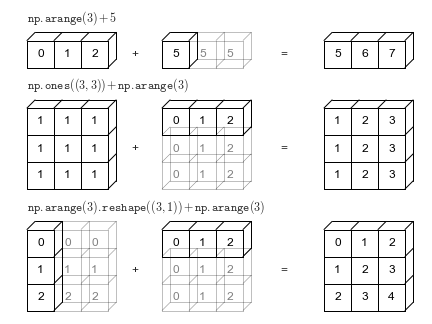

## Rules of Broadcasting

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3:  If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### Centering an array

In [121]:
X = np.random.random((10,3))
Xmean = X.mean(0)
X - Xmean

array([[ 0.13390251,  0.24086069, -0.22426649],
       [ 0.33952201, -0.3729474 ,  0.16225666],
       [-0.23344116,  0.40600215, -0.29789956],
       [-0.37049928, -0.15544538,  0.40491833],
       [-0.12728214, -0.32052327, -0.27234343],
       [-0.51629048, -0.23161475,  0.09940704],
       [ 0.300402  , -0.30309778, -0.24499524],
       [-0.15591709, -0.01061095, -0.0132487 ],
       [ 0.41818552,  0.15727945,  0.4742515 ],
       [ 0.21141812,  0.59009724, -0.0880801 ]])

###  Plotting a two-dimensional function

In [122]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

print(x)
print(y)
print(z)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[[0.        ]
 [0.10204082]
 [0.20408163]
 [0.30612245]
 [0.40816327]
 [0.51020408]
 [0.6122449 ]
 [0.71428571]
 [0.81632653]
 [0.91836735]
 [1.02040816]
 [1.12244898]
 [1.2244898 ]
 [1.32653061]
 [1.42857143]
 [1.53061224]
 [1.63265306]
 [1.73469388]
 [1.83673469]
 [1.93877551]
 [2.04081633]
 [2.14285714]
 [2.24489796]
 [2.34693878]
 [2.44897959]
 [2.55102041]
 [2.65306122]
 [2.75510204]
 [2.85714286]
 [2.95918367]
 [3.06122449]
 [3.16

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt

/tmp/ipykernel_10034/169681219.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


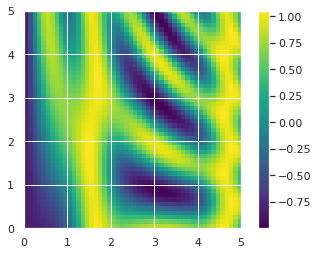

In [124]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar()

# Comparisons, Masks, and Boolean logic

Maskip comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion.

## Comparison Operators as ufuncs


In [125]:
x = np.array([1,2,3,4,5])

In [126]:
x < 3

array([ True,  True, False, False, False])

In [127]:
x <= 3

array([ True,  True,  True, False, False])

- `==`: `np.equal`
- `<`: `np.less`
- `>`: `np.greater`
- `!=`: `np.not_equal`
- `<=`: `np.less_equal`
- `>=`: `np.greater_equal`

### Counting entries

In [128]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [129]:
np.count_nonzero(x < 6)

8

We can also use `np.sum`, as `False` is 0 and `True` is 1

In [130]:
np.sum(x<6, axis=1)

array([4, 2, 2])

To check if at least one is true

In [131]:
np.any(x > 6)

True

To check if all the values are true

In [132]:
np.all(x > 6)

False

### Boolean operators

Same as with comparisons, booleans operators have been overwritten with ufuncs

## Boolean Arrays as Masks

In [133]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

# Fancy Indexing

We can fetch multiple value at the same time from an array


In [134]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [135]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

Fancy indexing also works in multiple dimensions.

In [136]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [137]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

## Combined Indexing

In [138]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [139]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

## Modifying Values with Fancy Indexing

In [140]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


Increading (with `+= 1`) many times on the same item won't work

In [141]:
i = [2,3,3,4,4,4]
x[i] += 1
print(x)

[  0  99 100   4 100   5   6   7  99   9]


For this, use `at` method of ufuncs

In [142]:
x = np.zeros(10)
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


# Sorting Arrays

Let's do a simple selection sort

In [143]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [144]:
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

It works but it's slow. \
Let's take a look at the Python and NumPy sort algorithms

## Fast Sorting in NumPy: `np.sort` and `np.argsort`

Python has `sort` and `sorted` functions, but NumPy `no.sort` is much more efficient and useful. Complexity is $\mathcal(N\,log\,N)$

In [145]:
x = np.random.randint(-1000, 1000, 100000, int)
%timeit sorted(x)
%timeit np.sort(x) # same as doing x.sort()

42.7 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.14 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


A related fuction is `argsort`, which instead returns the indices of the sorted elements


In [146]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)
print(x[i])

[1 0 3 2 4]
[1 2 3 4 5]


### Sorting along rows and columns

With `axis` parameter we can specify what must be sorted

In [147]:
rand = np.random.RandomState(42)
X = rand.randint(0,10, (4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [148]:
np.sort(X, axis=0) # sort each column

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [149]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorts: Partitioning

`np.partition` allow to put the $K$ smallest number at the left of the new array

In [150]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

This can also be specified with `axis` parameter

In [151]:
np.partition(X, 2, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

Just as we had `np.argsort`, we have `np.argpartition`

## Example: k-nearest neighbors

Let's create a random plane

In [152]:
rand = np.random.RandomState(42)
X = rand.rand(10,2)
print(X)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]


Let's plot them

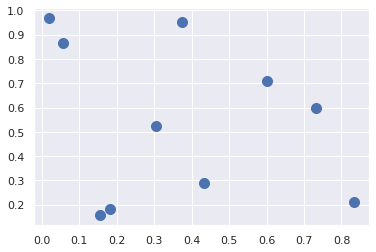

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=100)

Now we compute the distance between each pair of points

In [154]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [155]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [156]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

Just to double-check, we can look at the diagonal (distance between a point and itself)

In [157]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We can now use `np.argsort` to sort along each row

In [158]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


The first indice of each row is itself, because the nearest point is itself \
We don't really need to sort all the matrix, but only to find the k nearest neighbors. To do so, we can partition on $K+1$ (+1 to remove self point)

In [159]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

In order to visualize it, let's draw lines between a point and its $K$ nearest neighbors (excluding itself)

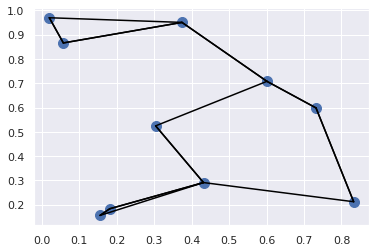

In [160]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# for each point
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

# Structured Data: NumPy's Structured Arrays

Imagine we have several categories of data on a number of people. It would be possible to store these in three seperate arrays:

In [161]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

Nothing tells us these arrays are related. \
Instead, we can put everything in one array:

In [162]:
x = np.zeros(4, dtype={'names': ('name', 'age', 'weight'),
                       'formats': ('U10', 'i4', 'f8')})
print(x.dtype)
x.shape

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


(4,)

We can now store everything inside

In [163]:
x['name'] = name
x['age'] = age
x['weight'] = weight
print(x)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


We can now refer them by their names

In [164]:
print(x['name'])
print(x[0]) # get all data from first row

['Alice' 'Bob' 'Cathy' 'Doug']
('Alice', 25, 55.)


Of course, we can also use boolean masking

In [165]:
x[x['age'] > 30]['name']

array(['Bob', 'Cathy'], dtype='<U10')

## Creating Structured Arrays

As we saw, we can create structured arrays with the dictionary method:

In [166]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

Numerical types can be specified using Python types of NumPy `dtype`s instead (like `np.str_`, `np.float32`)

## More Advanced Compound Types

Imagine we want to create a data type with a `mat` component (3x3 matrix)

In [167]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
